In [21]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import fitsio
import astropy.table as astTable

In [22]:
nside = 1024
npix = hp.nside2npix(nside)
field_list = ["spring1", "spring2", "spring3", "autumn1", "autumn2", "hectomap"]
num2 = np.zeros(npix, dtype="i4")
dsize = np.zeros(npix, dtype="f4")

for field in field_list:
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal_v2/galmaps/star_maps_{field}.fits"
    dd = fitsio.read(fname)
    num2 = num2 + dd["num"]
    dsize = dsize + dd["dsize"]

0.0036746980803447275
-0.7887625694274902 0.8170454502105713


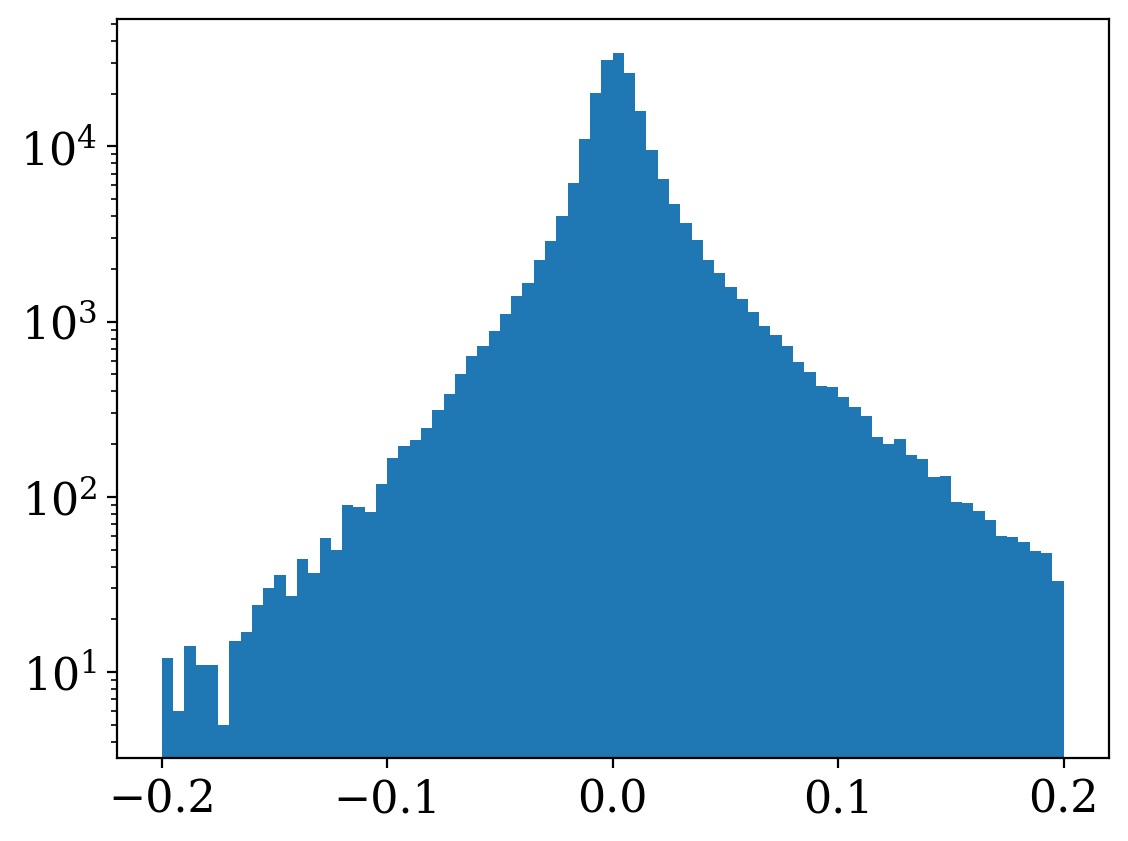

In [37]:
vv = dsize[num2>0] / num2[num2>0]
_=plt.hist(vv, bins=80, range=(-0.20, 0.20))
plt.yscale("log")
print(np.average(vv[np.abs(vv) < 0.1]))
print(np.nanmin(vv), np.nanmax(vv))

In [24]:
nside = 1024
npix = hp.nside2npix(nside)
field_list = ["spring1", "spring2", "spring3", "autumn1", "autumn2", "hectomap"]
num = np.zeros(npix, dtype="i4")
mask = np.zeros(npix, dtype="i4")
response = np.zeros(npix, dtype="f8")
variance = np.zeros(npix, dtype="f4")
fwhm = np.zeros(npix, dtype="f4")
e1_2 = np.zeros(npix, dtype="f4")
e2_2 = np.zeros(npix, dtype="f4")
e1_4 = np.zeros(npix, dtype="f4")
e2_4 = np.zeros(npix, dtype="f4")

for field in field_list:
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal_v2/galmaps/gal_maps_{field}.fits"
    dd = fitsio.read(fname)
    num = num + dd["num"]
    mask = mask | dd["mask"]
    response = response + dd["response"]
    variance = variance + dd["variance"]
    fwhm = fwhm + dd["fwhm"]
    e1_2 = e1_2 + dd["e1_2"]
    e2_2 = e2_2 + dd["e2_2"]
    e1_4 = e1_4 + dd["e1_4"]
    e2_4 = e2_4 + dd["e2_4"]
    print(np.sum(np.isnan(dd["fwhm"])))

2
0
0
0
0
0


In [38]:
mm = (
    (num > 5) 
    &(np.abs(e1_2 / (num + 1e-5)) < 0.2) 
    &(np.abs(e2_2 / (num + 1e-5)) < 0.2) 
    &(np.abs(e1_4 / (num + 1e-5)) < 0.05) 
    &(np.abs(e2_4 / (num + 1e-5)) < 0.05) 
    &(np.abs(fwhm / (num + 1e-5)) > 0.50) 
    &(np.abs(dsize / (num2 + 1e-5)) < 0.10) 
)
print(np.sum(num[mm]) / np.sum(num[num>5]))

0.946092057764783


In [32]:
hpfname = "/gpfs02/work/xiangchong.li/work/hsc_data/s23b/fdfc_hp_window_updated.fits"
hp.write_map(
    hpfname, 
    mm.astype(np.bool_),
    dtype=np.bool_, 
    nest=True, 
    overwrite=True,
)

-22.452020651745247 36.24085348895343


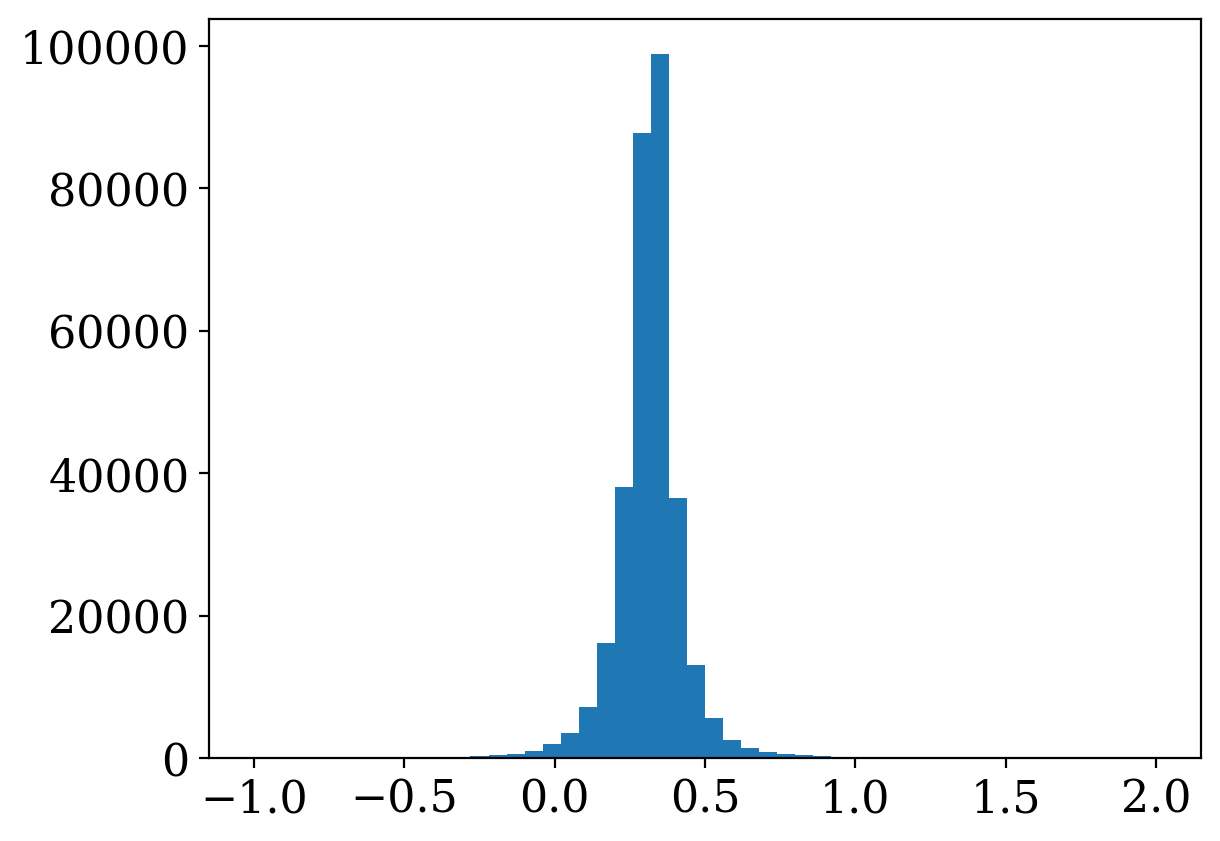

In [30]:
vv = response[mask>0] / num[mask>0]
_=plt.hist(vv, bins=50, range=(-1, 2.0))
# plt.yscale("log")
print(np.nanmin(vv), np.nanmax(vv))

In [66]:
np.sum(num>0)

320522

0.4172859499531408 0.8614671834309896


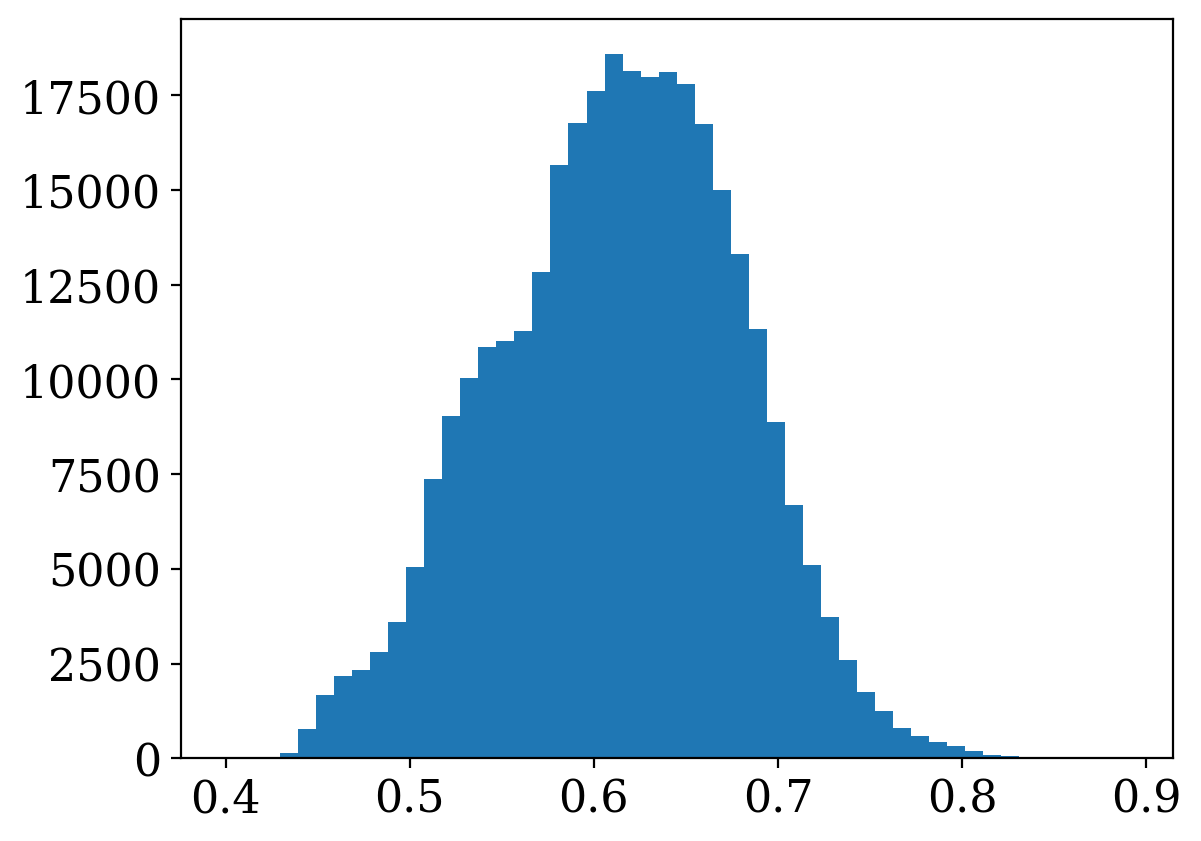

In [18]:
vv = fwhm[mask>0] / num[mask>0]
_=plt.hist(vv, bins=50, range=(0.4, 0.89))
print(np.nanmin(vv), np.nanmax(vv))
#plt.yscale("log")

-0.22359259923299155 0.13468616008758544


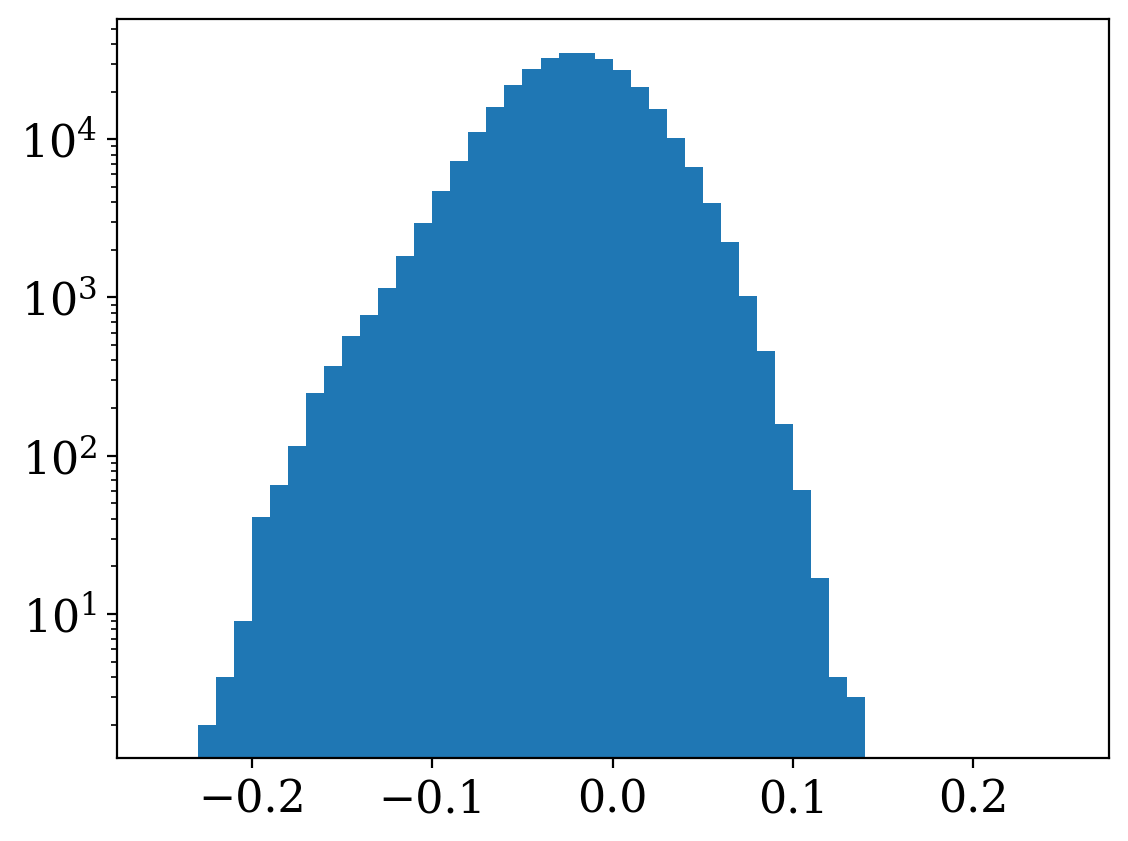

In [43]:
vv = e1_2[mask>0] / num[mask>0]
_=plt.hist(vv, bins=50, range=(-0.25, 0.25))
print(np.nanmin(vv), np.nanmax(vv))
plt.yscale("log")

-0.23871190060851394 0.2406374522617885


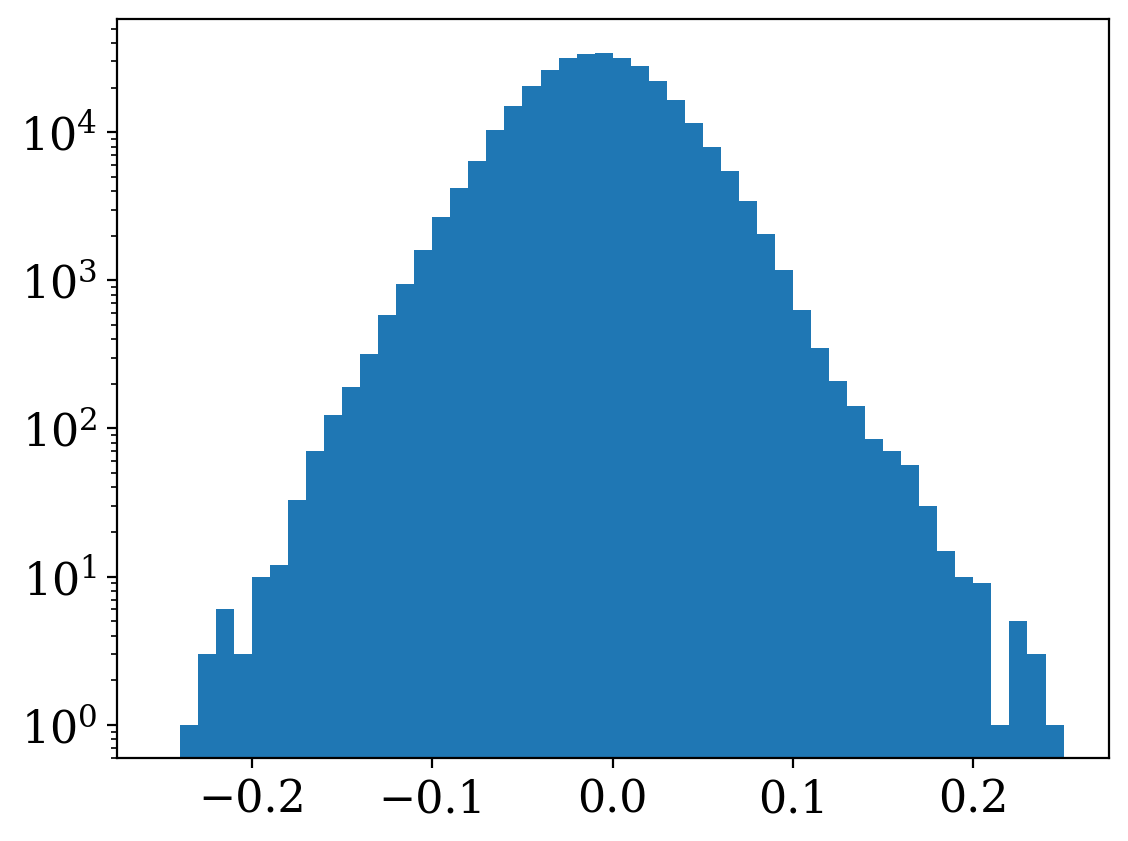

In [44]:
vv = e2_2[mask>0] / num[mask>0]
_=plt.hist(vv, bins=50, range=(-0.25, 0.25))
print(np.nanmin(vv), np.nanmax(vv))
plt.yscale("log")

-0.050689715843696095 0.44374001992715373


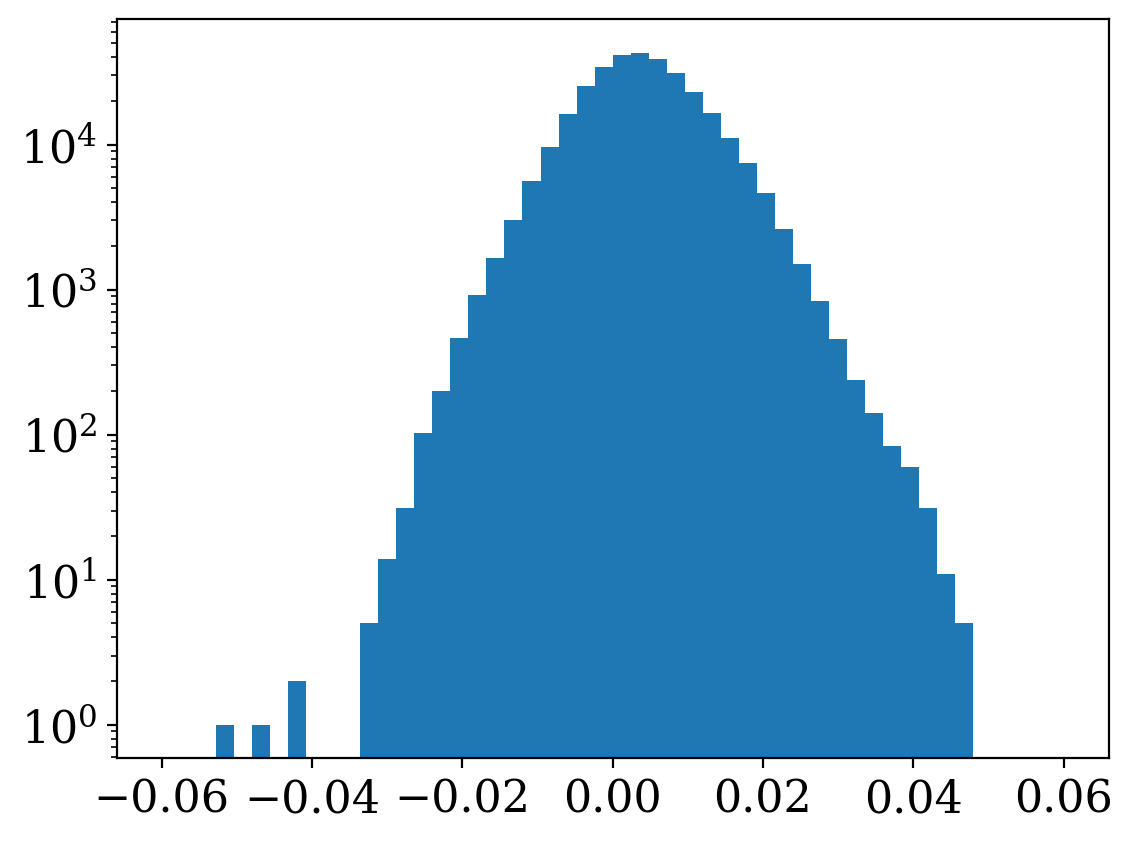

In [49]:
vv = e1_4[mask>0] / num[mask>0]
_=plt.hist(vv, bins=50, range=(-0.06, 0.06))
print(np.nanmin(vv), np.nanmax(vv))
plt.yscale("log")

-0.05614634354909261 0.085249696459089


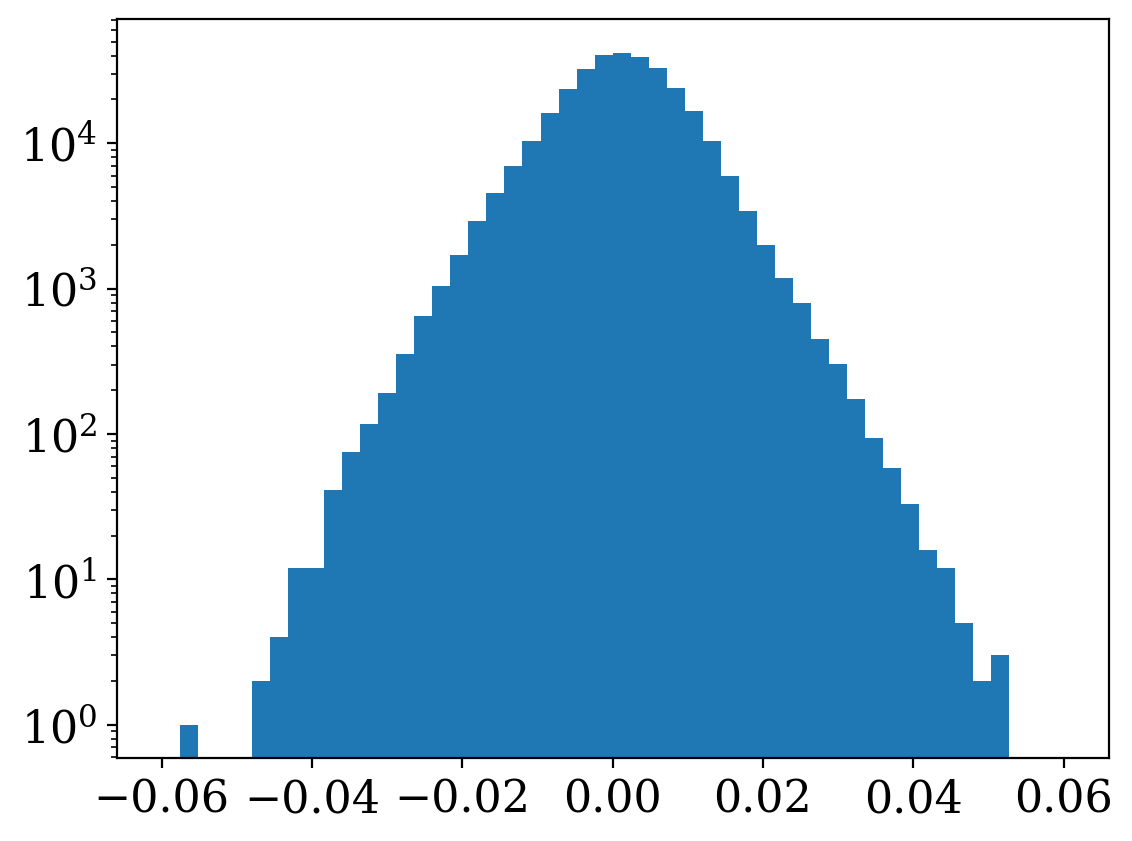

In [47]:
vv = e2_4[mask>0] / num[mask>0]
_=plt.hist(vv, bins=50, range=(-0.06, 0.06))
print(np.nanmin(vv), np.nanmax(vv))
plt.yscale("log")

0.013158811877171198 0.0016252499772235751


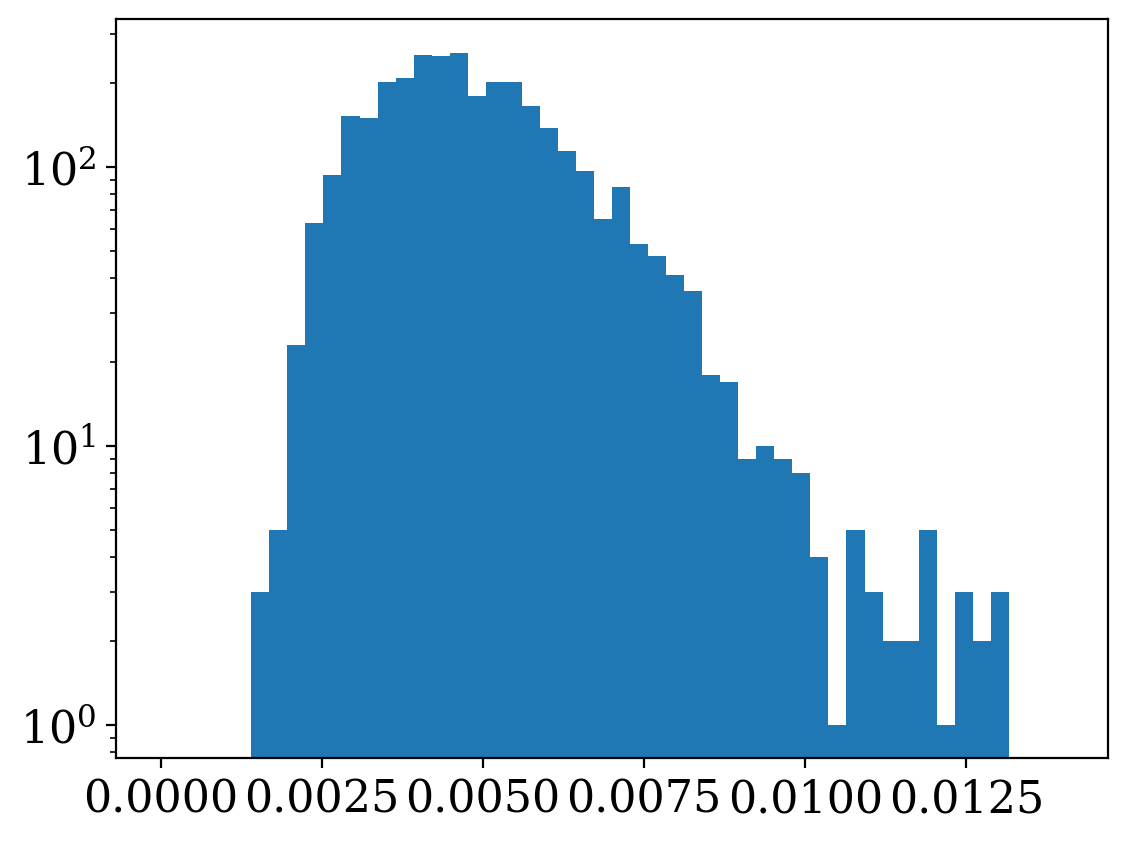

In [77]:
vv = variance[mask>0] / num[mask>0]
a=plt.hist(vv, bins=50, range=(0.0, 0.014))
print(np.nanmax(vv), np.nanmin(vv))
plt.yscale("log")

In [81]:
variance[mask>0]

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [80]:
np.sum(a[0])

3191.0

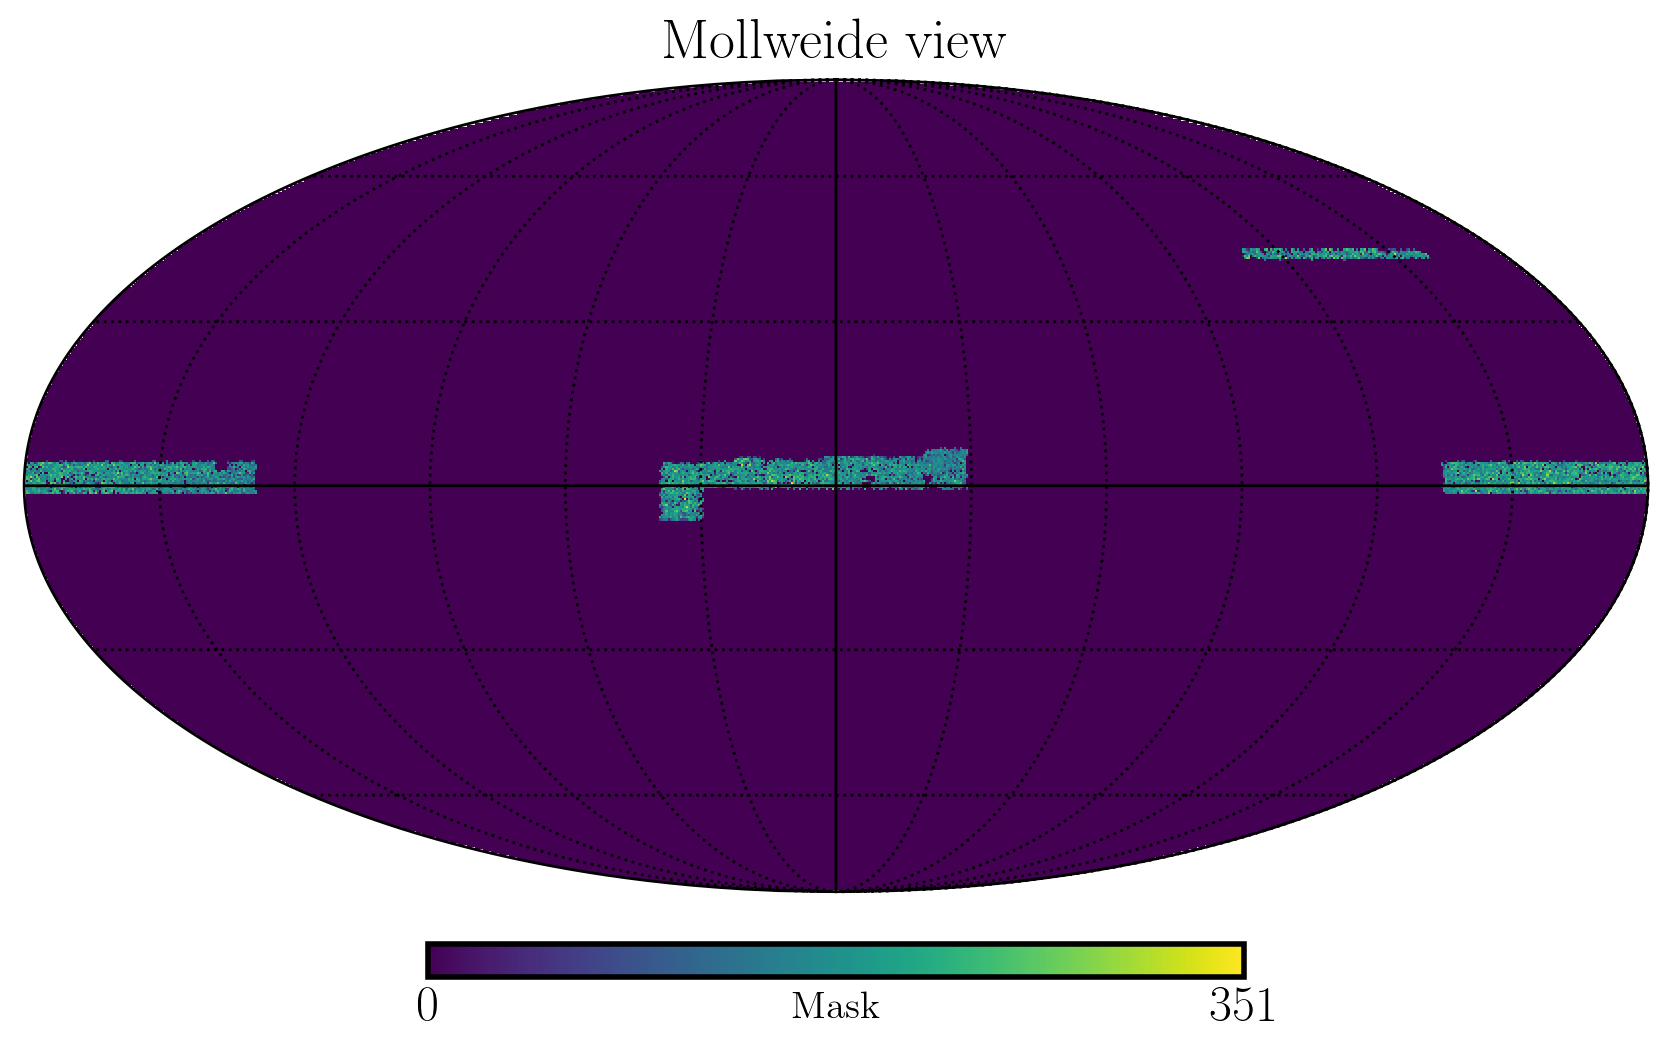

In [61]:
hp.mollview(num, nest=True, cmap="viridis", unit="Mask")
hp.graticule()
plt.show()

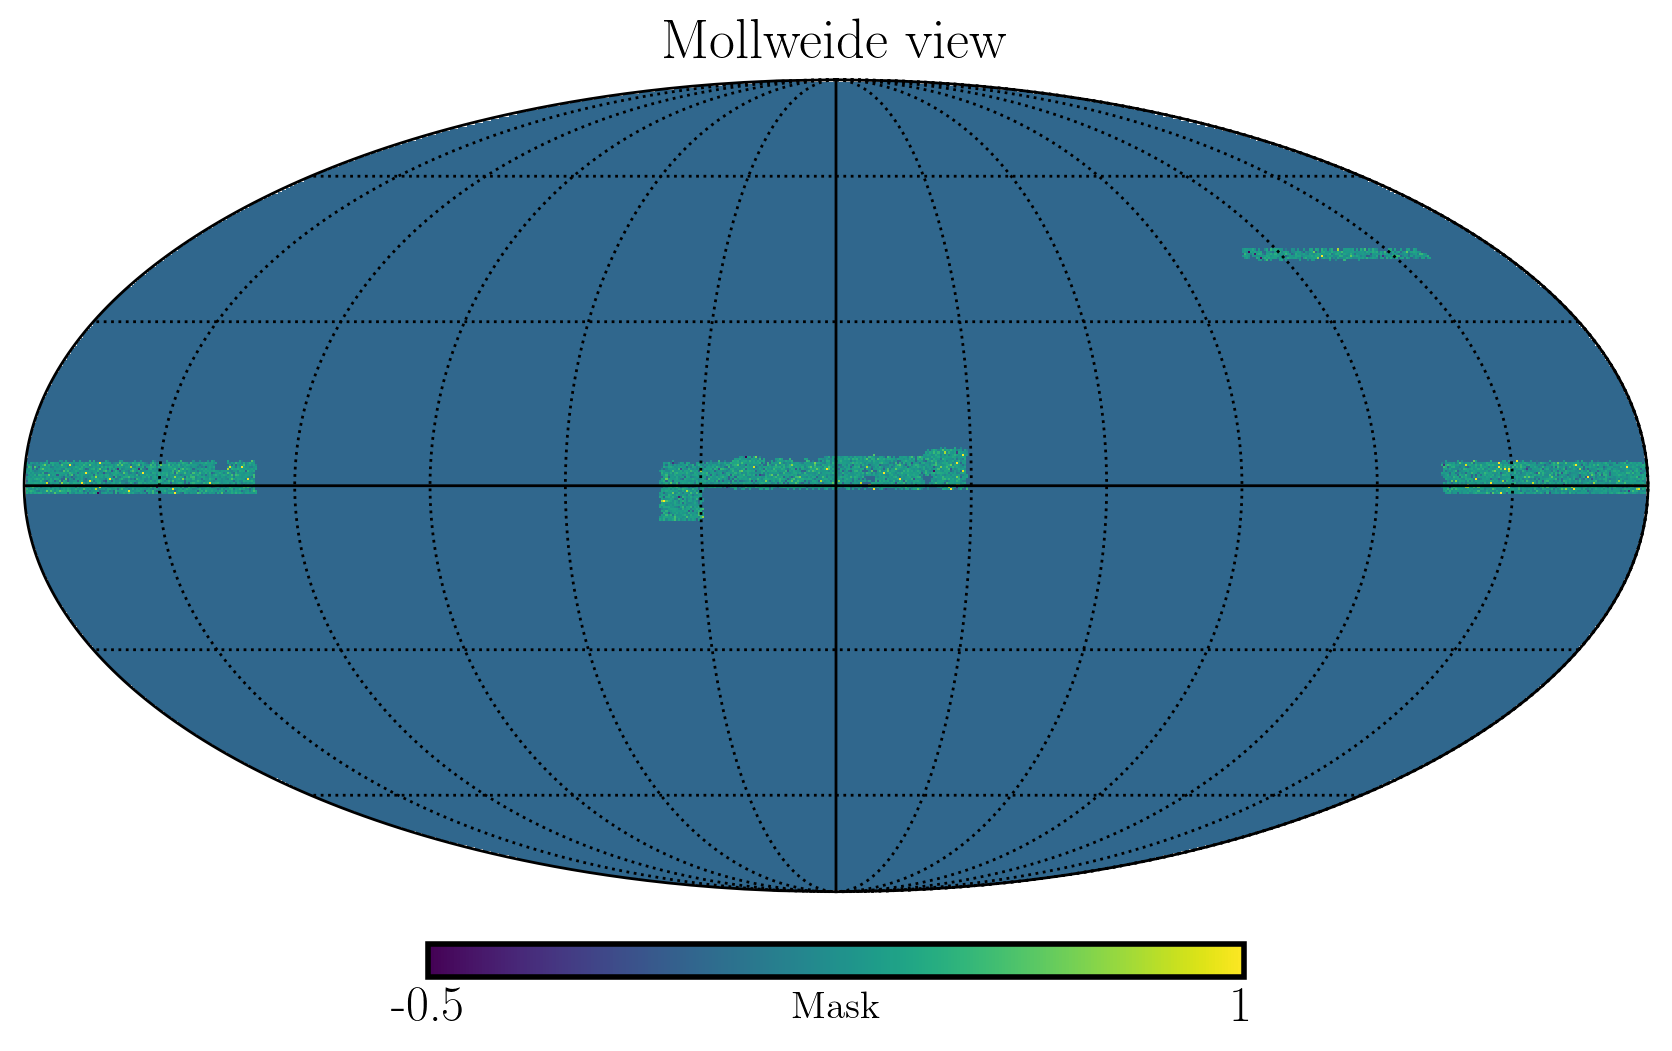

In [62]:
rrr = response / (num + 1e-13)
hp.mollview(rrr, nest=True, cmap="viridis", unit="Mask", min=-0.5, max=1.0)
hp.graticule()
plt.show()

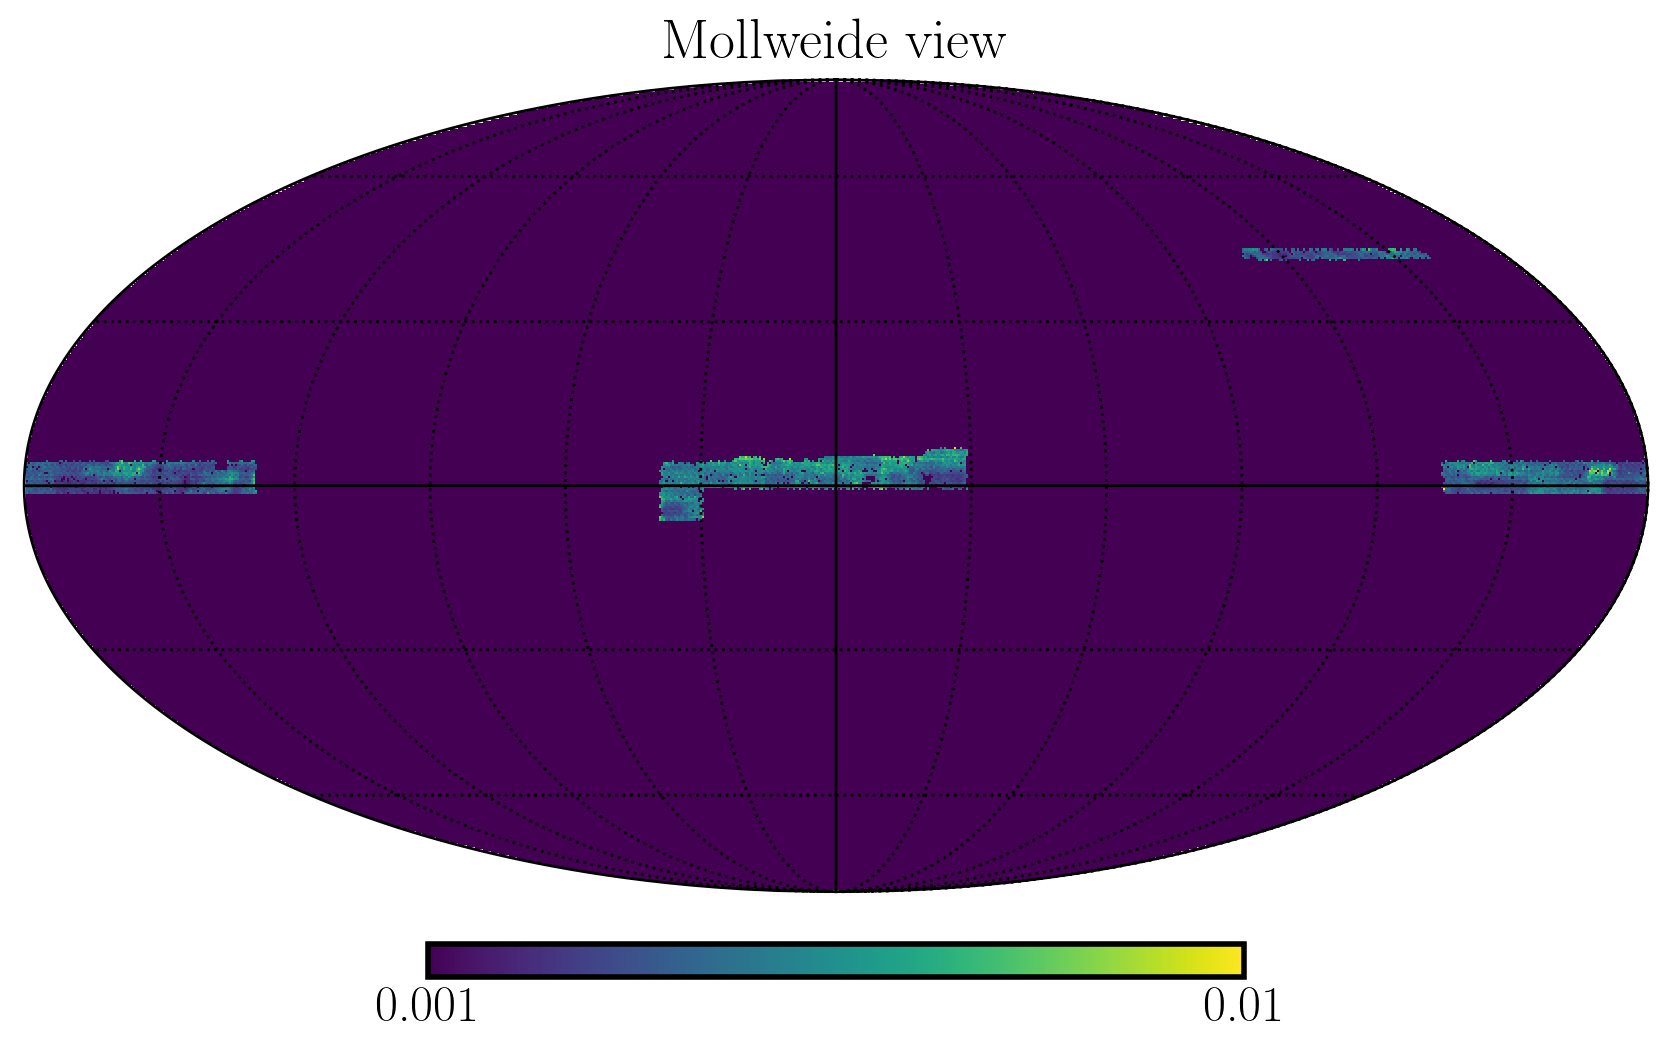

In [63]:
vvv = variance / (num + 1e-13)
hp.mollview(vvv, nest=True, cmap="viridis", min=1e-3, max=0.01)
hp.graticule()
plt.show()

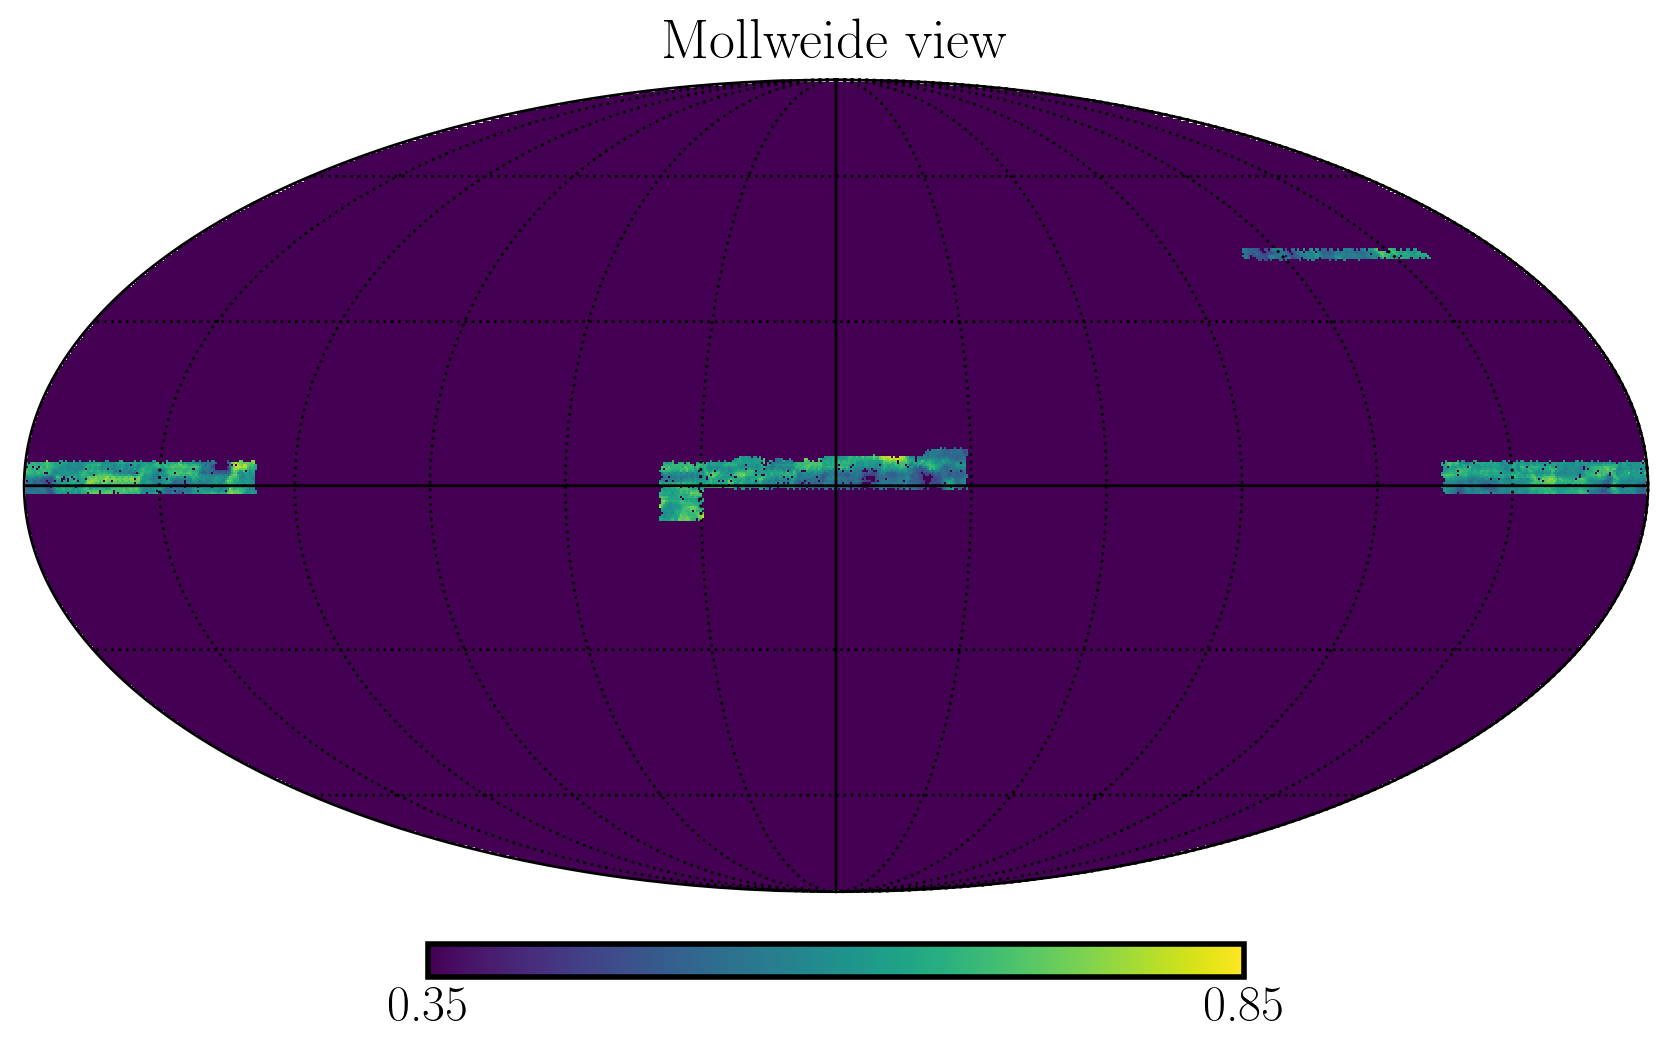

In [121]:
hp.mollview(fwhm / (num + 1e-13) , nest=True, cmap="viridis", min=0.35, max=0.85)
hp.graticule()
plt.show()